<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-Settings" data-toc-modified-id="Initial-Settings-1">Initial Settings</a></span></li><li><span><a href="#Figure-1" data-toc-modified-id="Figure-1-2">Figure 1</a></span></li><li><span><a href="#Figure-2" data-toc-modified-id="Figure-2-3">Figure 2</a></span></li><li><span><a href="#Figure-3" data-toc-modified-id="Figure-3-4">Figure 3</a></span></li><li><span><a href="#Figure-4" data-toc-modified-id="Figure-4-5">Figure 4</a></span></li><li><span><a href="#Figure-5" data-toc-modified-id="Figure-5-6">Figure 5</a></span><ul class="toc-item"><li><span><a href="#Figure-5a" data-toc-modified-id="Figure-5a-6.1">Figure 5a</a></span></li><li><span><a href="#Figure-5b" data-toc-modified-id="Figure-5b-6.2">Figure 5b</a></span></li></ul></li><li><span><a href="#Figure-6" data-toc-modified-id="Figure-6-7">Figure 6</a></span><ul class="toc-item"><li><span><a href="#Figure-6a" data-toc-modified-id="Figure-6a-7.1">Figure 6a</a></span></li><li><span><a href="#Figure-6b" data-toc-modified-id="Figure-6b-7.2">Figure 6b</a></span></li><li><span><a href="#Figure-6c" data-toc-modified-id="Figure-6c-7.3">Figure 6c</a></span></li><li><span><a href="#Figure-6d" data-toc-modified-id="Figure-6d-7.4">Figure 6d</a></span></li><li><span><a href="#Figure-6e" data-toc-modified-id="Figure-6e-7.5">Figure 6e</a></span></li></ul></li><li><span><a href="#Figure-7" data-toc-modified-id="Figure-7-8">Figure 7</a></span></li><li><span><a href="#Figure-8" data-toc-modified-id="Figure-8-9">Figure 8</a></span></li><li><span><a href="#Figure-9" data-toc-modified-id="Figure-9-10">Figure 9</a></span></li><li><span><a href="#Figure-9b" data-toc-modified-id="Figure-9b-11">Figure 9b</a></span></li><li><span><a href="#Figure-10" data-toc-modified-id="Figure-10-12">Figure 10</a></span><ul class="toc-item"><li><span><a href="#Figure-10a" data-toc-modified-id="Figure-10a-12.1">Figure 10a</a></span></li><li><span><a href="#Figure-10b" data-toc-modified-id="Figure-10b-12.2">Figure 10b</a></span></li></ul></li><li><span><a href="#Figure-11" data-toc-modified-id="Figure-11-13">Figure 11</a></span><ul class="toc-item"><li><span><a href="#Figure-11a" data-toc-modified-id="Figure-11a-13.1">Figure 11a</a></span></li></ul></li></ul></div>

# Initial Settings

In [1]:
dark_mode = False

In [2]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
try:
    import pcmdpy_gpu as ppy
except:
    import pcmdpy as ppy
%matplotlib inline

In [3]:
filters = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(filters)
driv = ppy.driver.Driver(iso_model, gpu=ppy.gpu_utils._GPU_ACTIVE)

In [4]:
plt.style.use('seaborn-poster')
if dark_mode:
    plt.style.use('dark_background')
    fig_dir = 'flowchart_dark/'
else:
    fig_dir = 'flowchart/'

In [5]:
def model_labels(ssp_model):
    logfeh, dust, logNpix, logage = ssp_model._params
    mu = ssp_model.dist_mod
    d_mpc = 10.**(0.2 * (mu - 25.))
    text = ['[Fe/H]: {:.1f}'.format(logfeh)]
    age_yr = 10.**(logage)
    if age_yr >= 1e9:
        age_text = 'age: {:.1f} Gyr'.format(age_yr / 1e9)
    else:
        age_text = 'age: {:.1f} Myr'.format(age_yr / 1e6)
    text += [age_text]
    text += ['Npix: {:d}'.format(int(10.**logNpix))]
    text += ['Dust: {:.1f} mags'.format(10.**dust)]
    text += ['D: {:.1f} Mpc'.format(d_mpc)]
    return text

In [6]:
model = ppy.galaxy.SSPSimple(np.array([0., np.log10(0.5), np.log10(300.), 9.0]), dmod=30.)

In [7]:
labels = model_labels(model)
labels

['[Fe/H]: 0.0', 'age: 1.0 Gyr', 'Npix: 300', 'Dust: 0.5 mags', 'D: 10.0 Mpc']

In [8]:
def step_1(model, figname=None, public=False):
    fs = 22
    fig, ax = plt.subplots(figsize=(7, 6))
    ax = ppy.plotting.plot_isochrone(iso_model, lw=0, axes=ax, gal_model=model)
    if public:
        xlab = r'$\leftarrow$ ' + 'Bluer \t\t Color \t\t Redder' + r' $\rightarrow$'
        ylab = r'$\leftarrow$ ' + 'Fainter \t Mag \t Brighter' + r' $\rightarrow$'
        ax.set_xticks([]), ax.set_yticks([])
    else:
        xlab = 'Color ({:s})'.format(ax.get_xlabel())
        ylab = 'Magnitude ({:s})'.format(ax.get_ylabel())
    ax.set_xlabel(xlab, fontsize=fs)
    ax.set_ylabel(ylab, fontsize=fs)
    plt.tight_layout()
    ax.set_ylim(ymax=22)
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight')
    return fig, ax

In [9]:
def add_label(ax, label, y, x=0.95):
    if dark_mode:
        c='k'
    else:
        c='w'
    ax.text(x, y, label, fontsize='x-large', transform=ax.transAxes,
            horizontalalignment='right', verticalalignment='top', bbox=dict(alpha=0.95, color=c))

# Figure 1

Create background

(<Figure size 504x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b7617eefef0>)

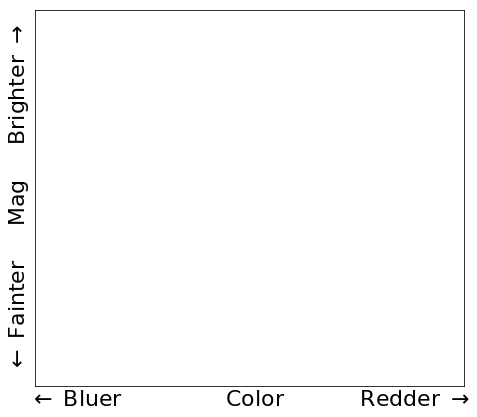

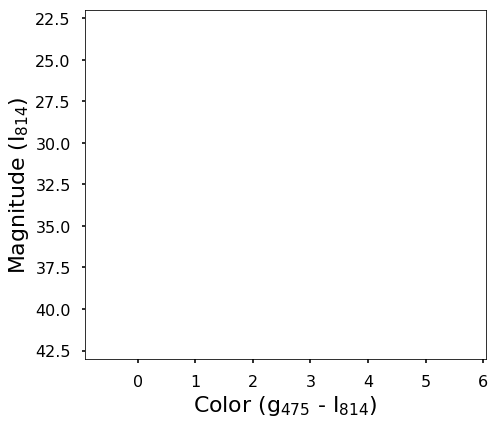

In [10]:
step_1(model, figname=fig_dir+'flowchart_public_1.pdf', public=True)
step_1(model, figname=fig_dir+'flowchart_1.pdf', public=False)

# Figure 2

Draw first isochrone

In [11]:
label_x = 0.95
y_0 = 0.71
dy = 0.06
label_ys = [y_0 - dy*i for i in range(5)]


In [12]:
def step_2(model, figname=None, lw=1, **kwargs):
    labels = model_labels(model)
    fig, ax = step_1(model, figname=None, **kwargs)
    if dark_mode:
        c='w'
    else:
        c='k'
    ppy.plotting.plot_isochrone(iso_model, axes=ax, update_axes=False,
                                gal_model=model, lw=lw, color=c, zorder=-1)
    add_label(ax, labels[0], label_ys[0], x=label_x)
    add_label(ax, labels[1], label_ys[1], x=label_x)
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight')
    return fig, ax

(<Figure size 504x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b761c2887f0>)

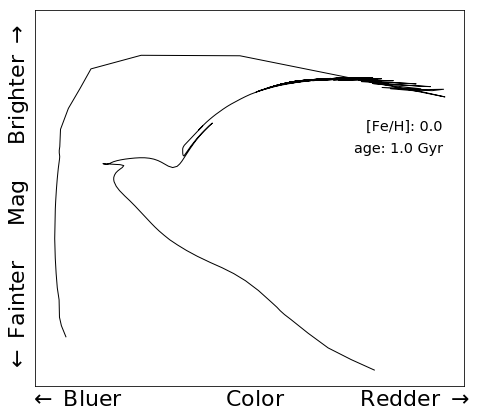

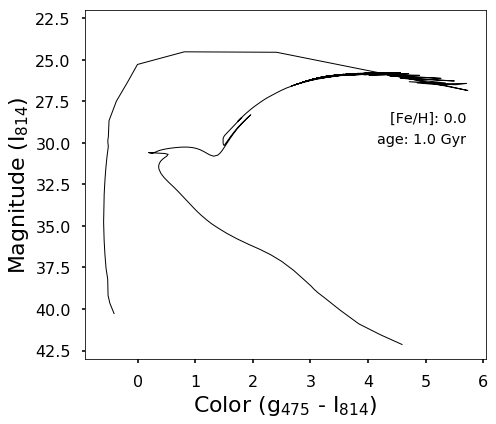

In [13]:
step_2(model, figname=fig_dir + 'flowchart_public_2.pdf', public=True)
step_2(model, figname=fig_dir + 'flowchart_2.pdf',  public=False)

# Figure 3

Sample from isochrone

In [14]:
imf, _, m, _ = iso_model.model_galaxy(model, return_mass=True)

In [15]:
def step_3(model, figname=None, seed=1023410, alpha=1, **kwargs):
    labels = model_labels(model)
    fig, ax = step_2(model, figname=None, **kwargs)
    imf, mags = iso_model.model_galaxy(model, downsample=1)
    colors = mags[1] - mags[0]
    mags = mags[0]
    imf_norm = imf / np.sum(imf)

    rand = np.random.RandomState(seed)
    N_stars = rand.poisson(model.Npix)
    print('{:d} stars'.format(N_stars))

    #NOTE: not exactly correct algorithm, since we choose to not allow repeats
    rand = np.random.RandomState(seed)
    stars = rand.choice(np.arange(len(imf)), size=N_stars, replace=False, p=imf_norm)

    ms = 40. +  ((max(mags) - mags))**2.5

    edgecolors='k'
    if dark_mode:
        edgecolors=''
    dx = 0.0*(np.random.random(N_stars) - 0.5)
    dy = 0.0*(np.random.random(N_stars) - 0.5)
    ax.scatter(colors[stars]+dx, mags[stars]+dy, marker='o', s=ms[stars], cmap='coolwarm', c=colors[stars],
               vmin=0, vmax=6, edgecolors=edgecolors, alpha=alpha)
    add_label(ax, labels[2] + ' ({:d})'.format(N_stars), label_ys[2], x=label_x)
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight')
    return fig, ax, colors[stars], mags[stars], ms[stars]

318 stars
318 stars


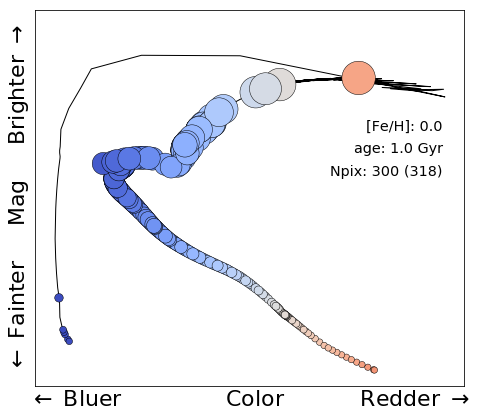

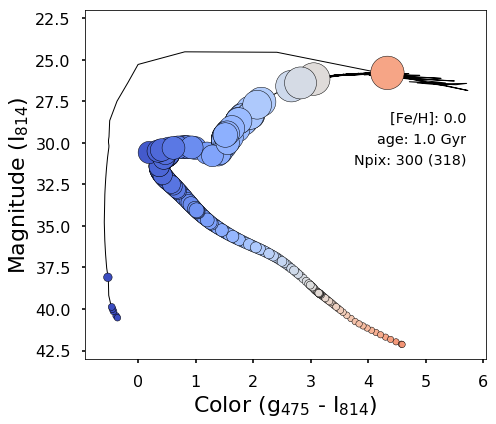

In [16]:
step_3(model, figname=fig_dir + 'flowchart_public_3.pdf', public=True);
step_3(model, figname=fig_dir + 'flowchart_3.pdf', public=False);

# Figure 4

Remove isochrone line

In [17]:
def step_4(model, figname=None, lw=0, **kwargs):
    fig, ax, colors, mags, ms = step_3(model, lw=lw, figname=None, **kwargs)
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight')
    return fig, ax, colors, mags, ms

318 stars
318 stars


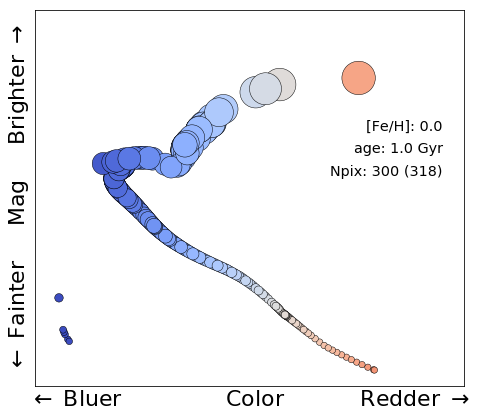

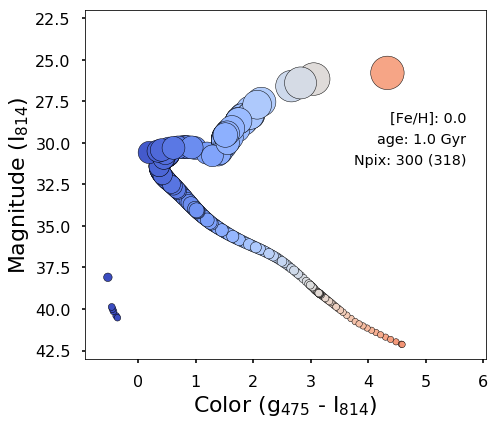

In [18]:
step_4(model, figname=fig_dir + 'flowchart_public_4.pdf', public=True);
step_4(model, figname=fig_dir + 'flowchart_4.pdf', public=False);

# Figure 5

apply dust

In [19]:
def step_5(model, figname=None, alpha=1., a_nodust=0.2, **kwargs):
    labels = model_labels(model)
    fig, ax, colors, mags, ms = step_4(model, figname=None, alpha=a_nodust, **kwargs)
    dust = 10.**(model.dust_model.mu_dust)
    dm = filters[0].red_per_ebv * dust
    dc = filters[1].red_per_ebv*dust  - dm
    colors += dc
    mags += dm
    edgecolors='k'
    if dark_mode:
        edgecolors=''
    ax.scatter(colors, mags, marker='o', s=ms, cmap='coolwarm', c=colors,
               vmin=0, vmax=6, alpha=alpha, edgecolors=edgecolors)
    add_label(ax, labels[3], label_ys[3], x=label_x)
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight')
    return fig, ax, colors, mags, ms

## Figure 5a

318 stars
318 stars


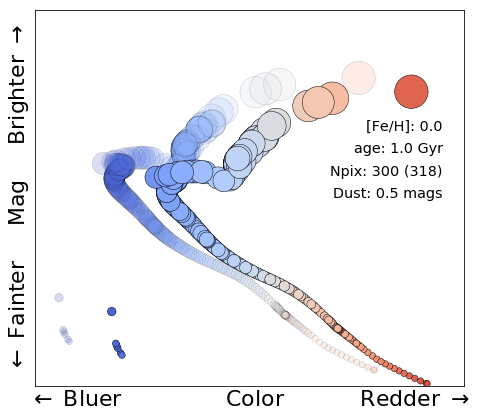

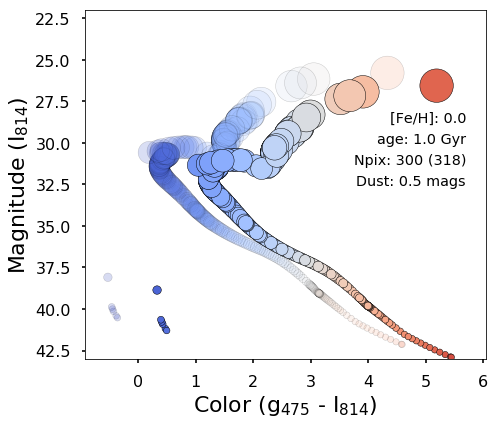

In [20]:
step_5(model, figname=fig_dir+'flowchart_public_5a.pdf', public=True);
step_5(model, figname=fig_dir+'flowchart_5a.pdf', public=False);

## Figure 5b

318 stars
318 stars


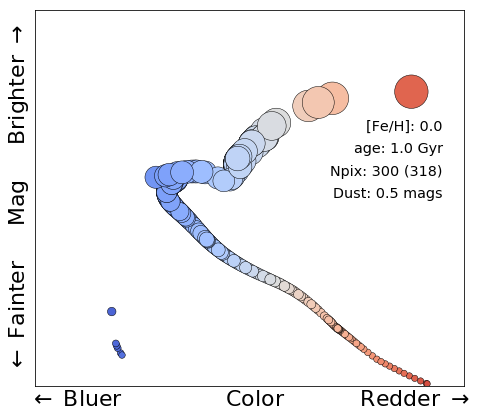

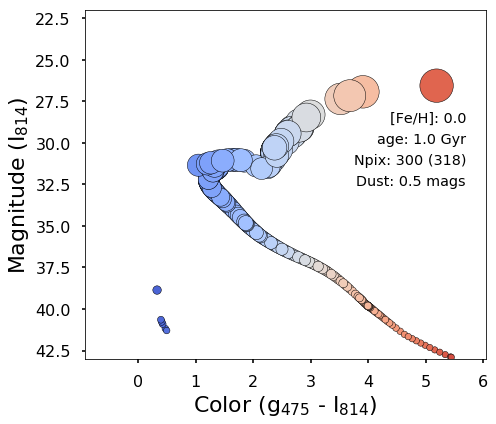

In [21]:
step_5(model, figname=fig_dir+'flowchart_public_5b.pdf', a_nodust=0., public=True);
step_5(model, figname=fig_dir+'flowchart_5b.pdf', a_nodust=0., public=False);

# Figure 6

update distance

In [22]:
def step_6(model, figname=None, a_close=0.2, alpha=1., **kwargs):
    fig, ax, colors, mags, ms = step_5(model, figname=None, a_nodust=0., alpha=a_close,
                                       **kwargs)
    model.distance_model.dmod -= 2.
    labels = model_labels(model)
    mags -= 2.
    model.distance_model.dmod += 2.
    edgecolors='k'
    if dark_mode:
        edgecolors=''
    ax.scatter(colors, mags, marker='o', alpha=alpha, s=ms, cmap='coolwarm', c=colors,
               vmin=0, vmax=6, edgecolors=edgecolors)
    add_label(ax, labels[4], label_ys[4], x=label_x)
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight')
    return fig, ax, colors, mags, ms

## Figure 6a

318 stars
318 stars


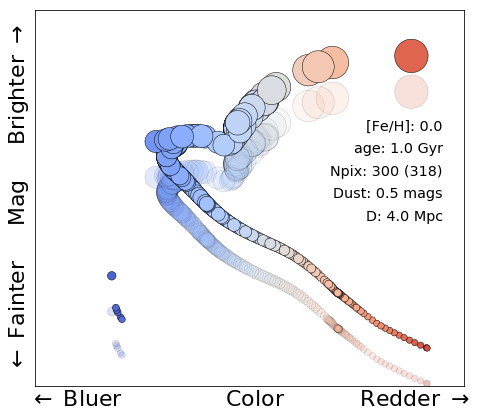

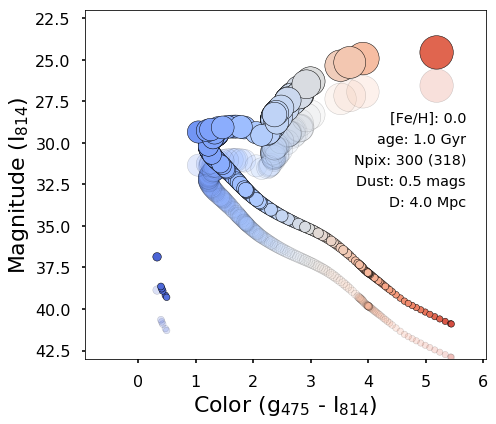

In [23]:
step_6(model, figname=fig_dir+'flowchart_public_6a.pdf', public=True);
step_6(model, figname=fig_dir+'flowchart_6a.pdf', public=False);

## Figure 6b

318 stars
318 stars


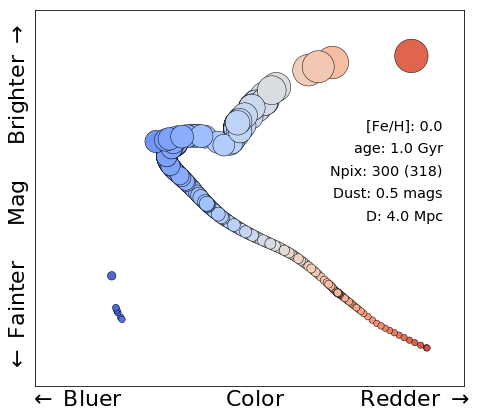

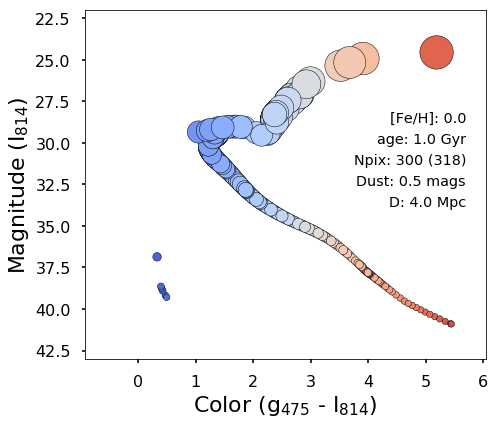

In [24]:
step_6(model, figname=fig_dir+'flowchart_public_6b.pdf', a_close=0., public=True);
f, a, colors, mags, ms = step_6(model, figname=fig_dir+'flowchart_6b.pdf', a_close=0., public=False);

## Figure 6c

Alternative draw

280 stars
280 stars


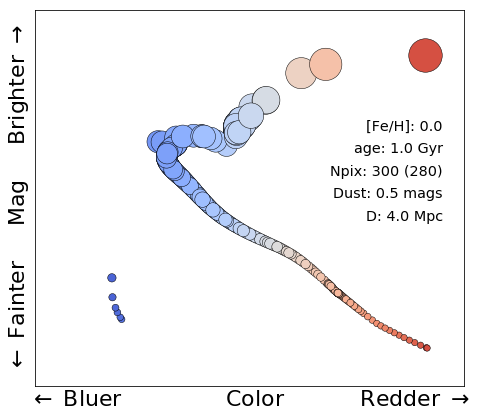

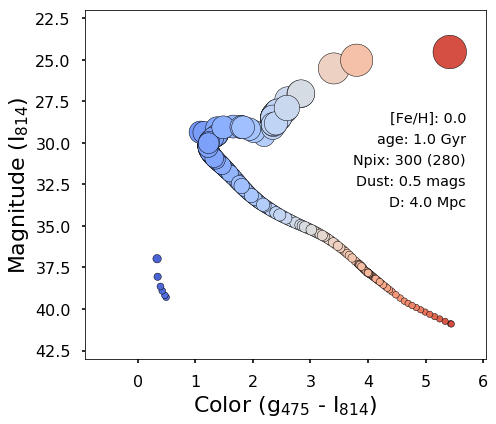

In [25]:
seed_c = 12
step_6(model, figname=fig_dir+'flowchart_public_6c.pdf', a_close=0., seed=seed_c, public=True);
f, a, colors, mags, ms = step_6(model, figname=fig_dir+'flowchart_6c.pdf', seed=seed_c, a_close=0., public=False);

## Figure 6d

Another alternative draw

281 stars
281 stars


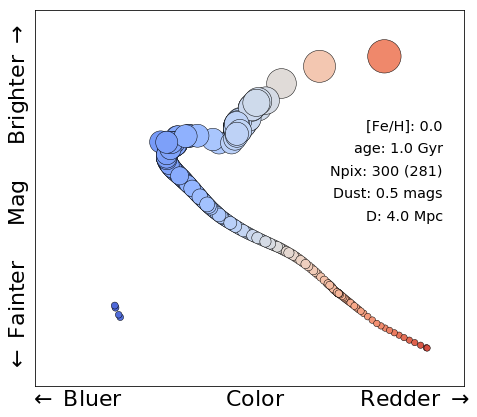

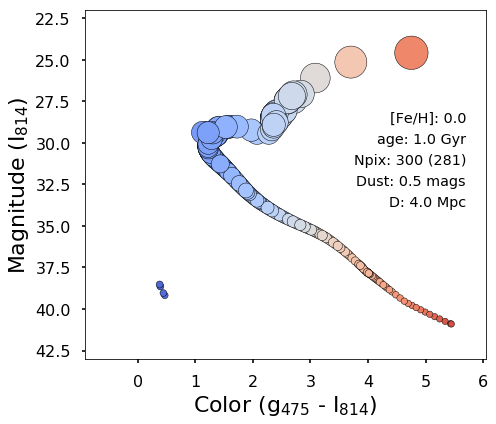

In [26]:
seed_d = 582938
step_6(model, figname=fig_dir+'flowchart_public_6d.pdf', a_close=0., seed=seed_d, public=True);
f, a, colors, mags, ms = step_6(model, figname=fig_dir+'flowchart_6d.pdf', seed=seed_d, a_close=0., public=False);

## Figure 6e

Another alternative draw

320 stars
320 stars


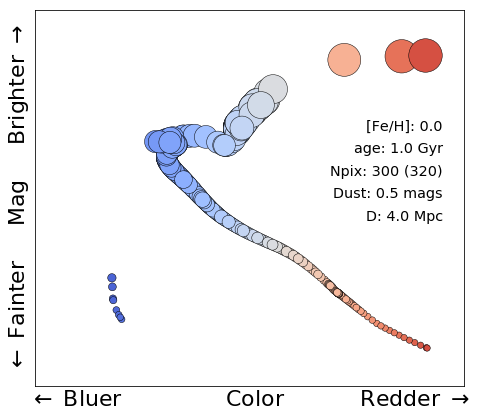

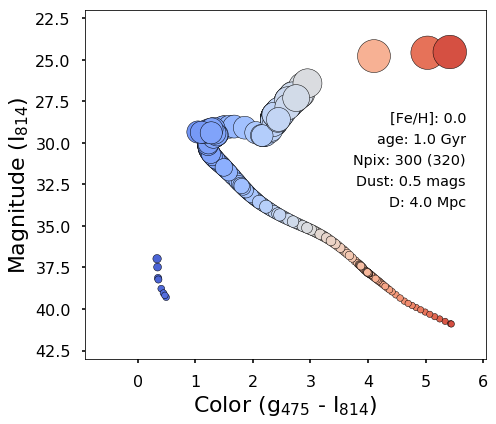

In [27]:
seed_e = 53
step_6(model, figname=fig_dir+'flowchart_public_6e.pdf', a_close=0., seed=seed_e, public=True);
f, a, colors, mags, ms = step_6(model, figname=fig_dir+'flowchart_6e.pdf', seed=seed_e, a_close=0., public=False);

# Figure 7

Show placing the stars in the pixel

In [28]:
def step_7(model, figname=None, seed=18, **kwargs):
    f, a, colors, mags, ms = step_6(model)
    f.clear()
    plt.close()
    fig, axis = plt.subplots(figsize=(3,3))
    axis.set_aspect('auto')
    axis.set_xticks([]), axis.set_yticks([])
    plt.tight_layout()
    edgecolors='k'
    if dark_mode:
        edgecolors=''
    rand = np.random.RandomState(seed)
    for i in ms.argsort()[::-1]:
        x, y = rand.rand(), rand.rand()
        axis.scatter(x, y, marker='o', s=ms[i], cmap='coolwarm', c=colors[i], vmin=0, vmax=6,
                     edgecolors=edgecolors)
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight', pad_inches=0)
    return fig, axis

318 stars
318 stars


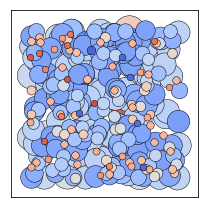

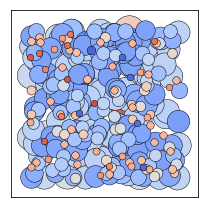

In [29]:
step_7(model, figname=fig_dir+'flowchart_public_7a.pdf');
step_7(model, figname=fig_dir+'flowchart_7a.pdf');

# Figure 8

Show multiple pixels

In [30]:
def step_8_old(model, figname=None, r_factor=.8, g_factor=1.5, b_factor=1., s=slice(0, 5), psf=False):
    model.dist_mod -= 2.
    _, ims = driv.simulate(model, 128, downsample=5, fixed_seed=True, psf=psf)
    model.dist_mod += 2.
    new_im = np.zeros((3, 128, 128))
    new_im[0] = ims[0]**r_factor
    new_im[1] = (ims[1])**g_factor
    new_im[2] = ims[1]**b_factor
    ax = ppy.plotting.plot_rgb_image(new_im[:, s, s], clip_percent=98.)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis('off')
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname, bbox_inches='tight', pad_inches=0)
    return ax, ims

In [31]:
def step_8(model, figname=None, s=slice(0, 5), psf=False):
    model.distance_model.dmod -= 2.
    _, ims = driv.simulate(model, 256, downsample=5, fixed_seed=True, psf=psf)
    model.distance_model.dmod += 2.
    new_im = ims[0]
    fig, ax = plt.subplots()
    ax.imshow(new_im[s, s], cmap='Greys_r', )
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis('off')
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname, bbox_inches='tight', pad_inches=0)
    return ax, ims

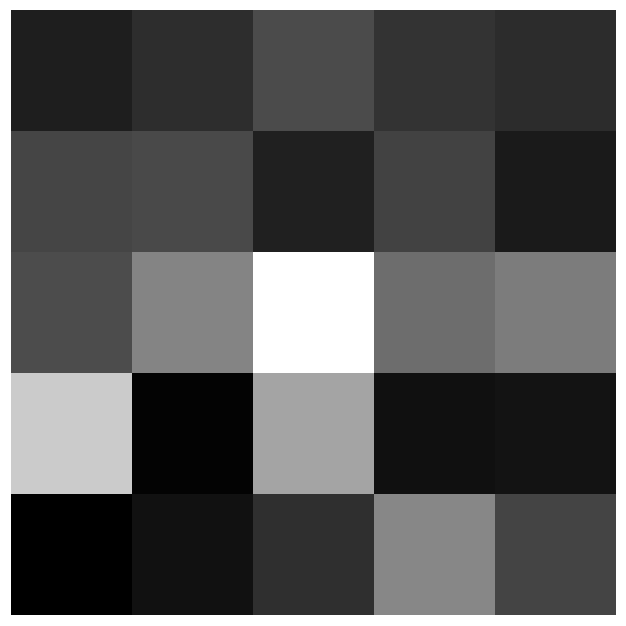

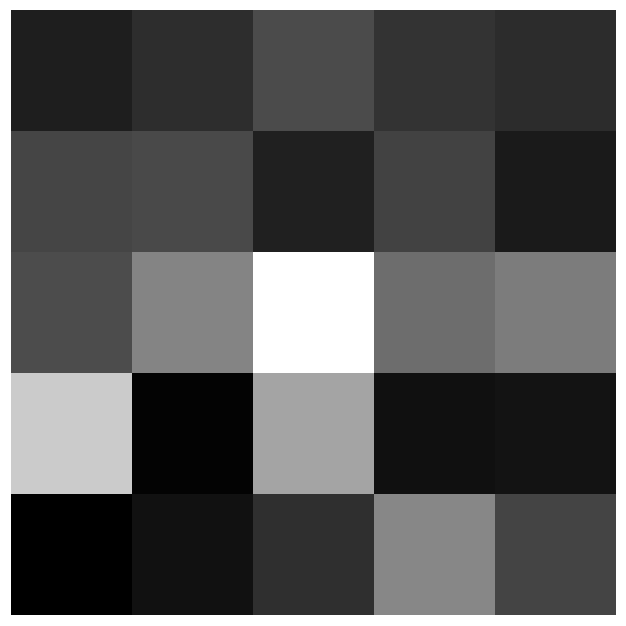

In [32]:
ax, ims = step_8(model, figname=fig_dir + 'flowchart_public_8.jpg', s=slice(0, 5))
ax, ims = step_8(model, figname=fig_dir + 'flowchart_8.jpg', s=slice(0, 5))

# Figure 9

Show the image before PSF

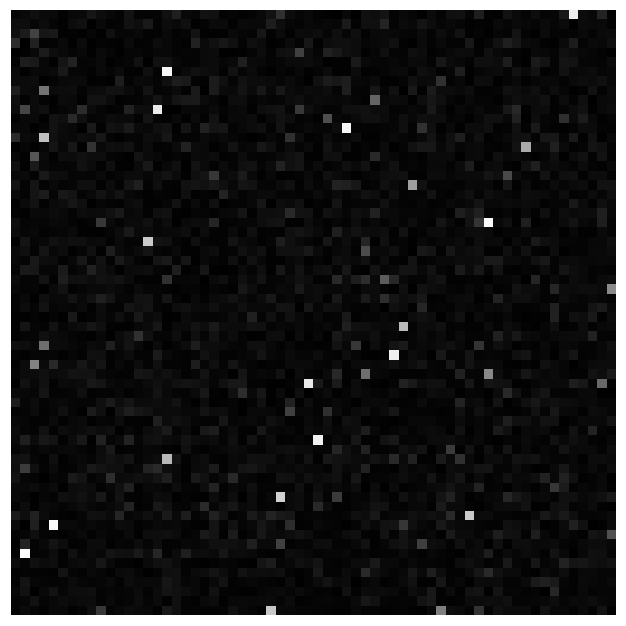

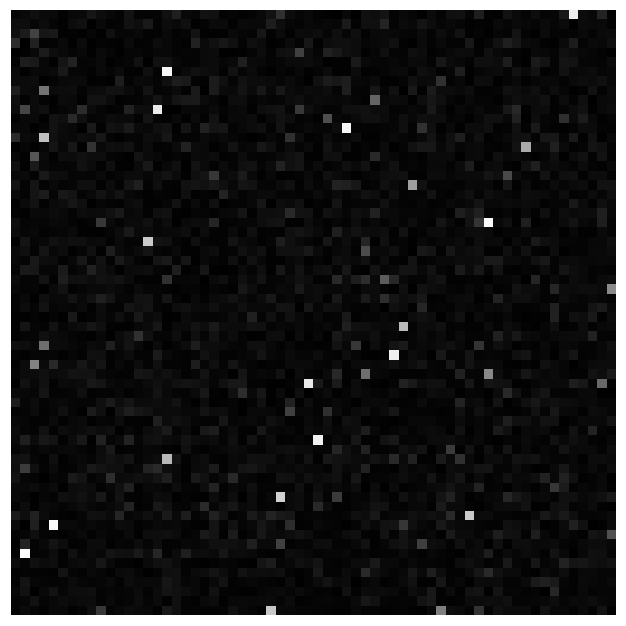

In [33]:
s = slice(0, 64)
ax, ims = step_8(model, figname=fig_dir + 'flowchart_public_9a.jpg', s=s)
ax, ims = step_8(model, figname=fig_dir + 'flowchart_9a.jpg', s=s)

# Figure 9b

After PSF

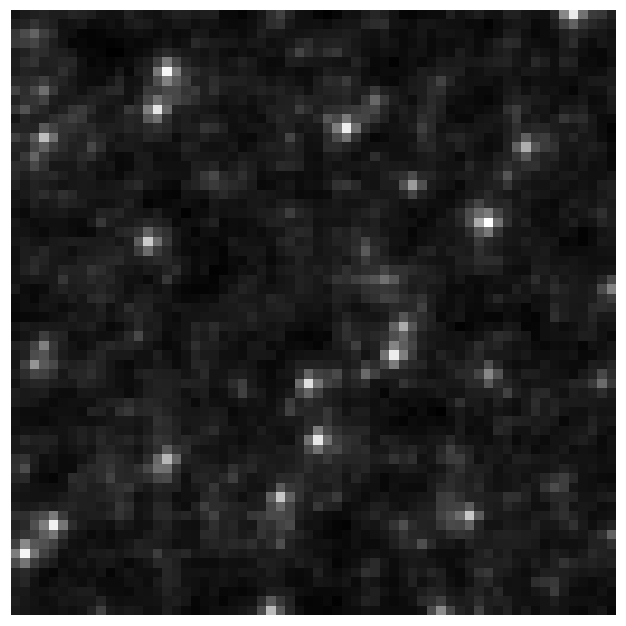

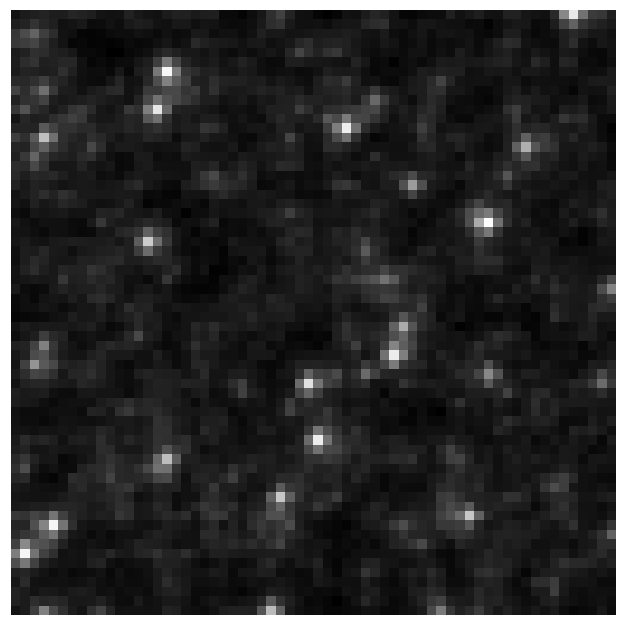

In [34]:
ax, ims = step_8(model, figname=fig_dir + 'flowchart_public_9b.jpg', s=s, psf=True)
ax, ims = step_8(model, figname=fig_dir + 'flowchart_9b.jpg', s=s, psf=True)

# Figure 10

Plot the final PCMD

In [35]:
def step_10a(model, figname=None, **kwargs):
    fig, ax, _, _, _ = step_6(model, a_close=0., alpha=0., lw=1, **kwargs)
    ax.set_xlim([0, 5])
    ax.set_ylim([32, 26])
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight')
    return fig, ax

In [36]:
def step_10b(model, figname=None, **kwargs):
    fig, ax = step_10a(model, **kwargs)
    model.distance_model.dmod -= 2.
    pcmd, _ = driv.simulate(model, 256, downsample=5, fixed_seed=True, psf=True, shot_noise=False)
    model.distance_model.dmod += 2.
    ax, bins, norm = ppy.plotting.plot_pcmd(pcmd, ax=ax, keep_limits=True)
    if figname is not None:
        fig.savefig(figname, bbox_inches='tight')
    return ax, pcmd

## Figure 10a

Hess diagram background

318 stars
318 stars


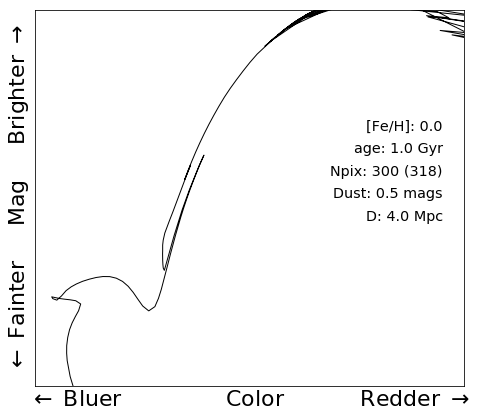

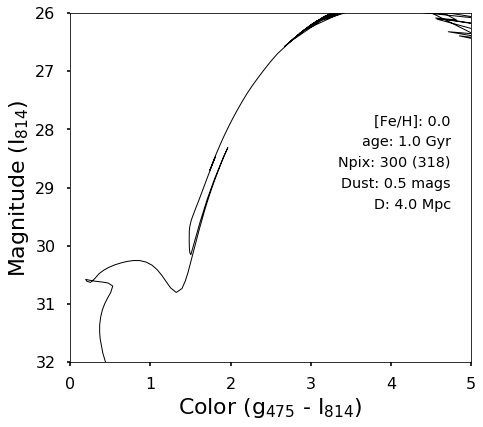

In [37]:
fig, ax = step_10a(model, figname=fig_dir + 'flowchart_public_10a.pdf', public=True);
fig, ax = step_10a(model, figname=fig_dir + 'flowchart_10a.pdf', public=False);

## Figure 10b

Show the PCMD

318 stars
318 stars


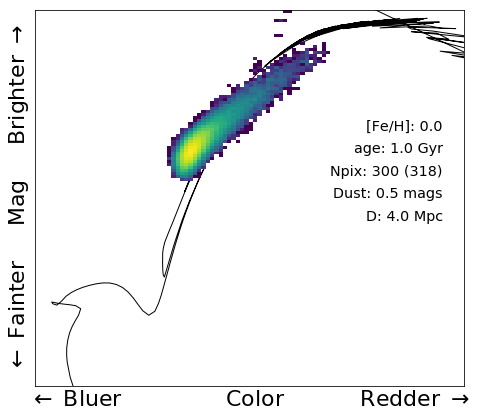

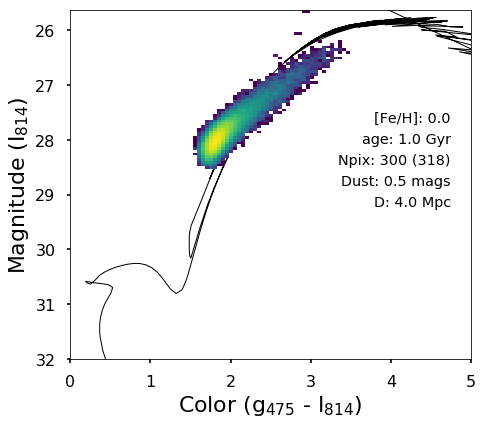

In [38]:
fig, ax = step_10b(model, figname=fig_dir + 'flowchart_public_10b.pdf', public=True);
fig, ax = step_10b(model, figname=fig_dir + 'flowchart_10b.pdf', public=False);

# Figure 11

Change the properties

In [39]:
new_model = ppy.galaxy.SSPSimple(np.array([-0.5, np.log10(0.1), 2., 10.]), dmod=30.)

## Figure 11a

Show the image and PCMD

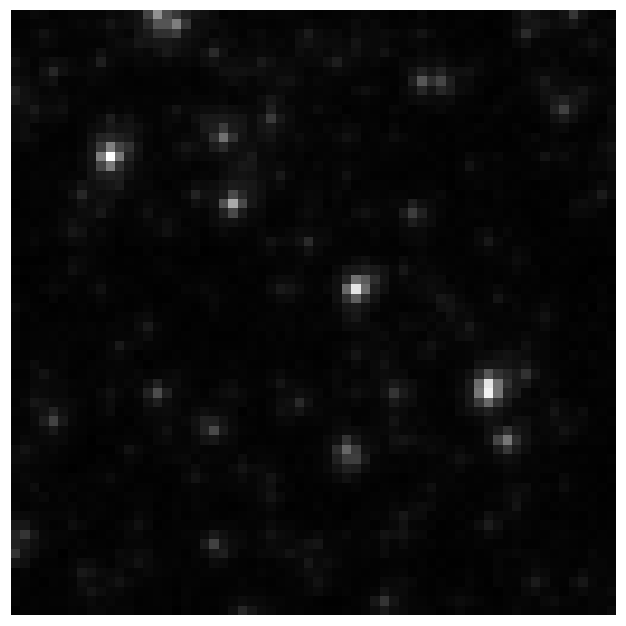

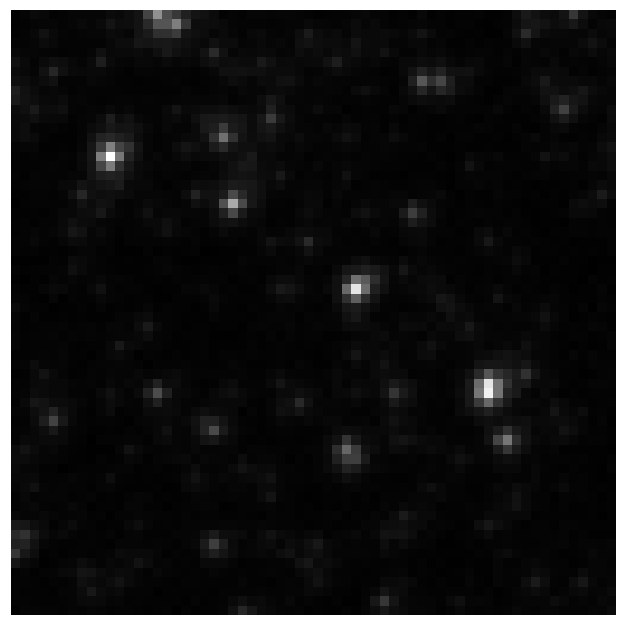

In [40]:
ax, ims = step_8(new_model, figname=fig_dir + 'flowchart_public_11a.jpg', s=slice(0, 64),psf=True)
ax, ims = step_8(new_model, figname=fig_dir + 'flowchart_11a.jpg', s=slice(0, 64), psf=True)

110 stars
110 stars


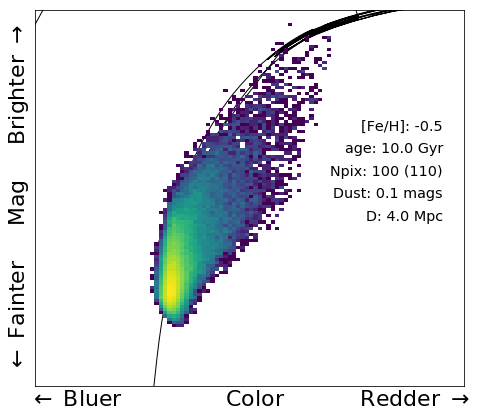

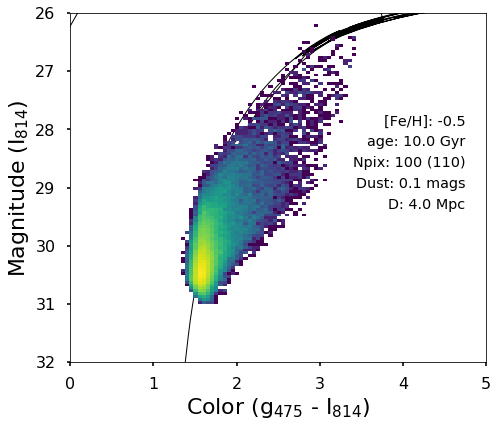

In [41]:
fig, ax = step_10b(new_model, figname=fig_dir + 'flowchart_public_11b.pdf', public=True);
fig, ax = step_10b(new_model, figname=fig_dir + 'flowchart_11b.pdf', public=False);